In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from adjustText import adjust_text
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

In [2]:
plt.style.use('default')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
plt.rcParams['axes.facecolor']='white'

In [3]:
pal = sns.color_palette("colorblind")

In [4]:
var_info_tbl = pd.read_csv("../../results/model_runs/bean_negctrl/bean_run_result.bean_count_LDLvar_annotated/bean_element_result.MixtureNormal+Acc.csv", index_col=0)
allele_info_tbl = pd.read_excel("../../resources/LDLvar/20221013_LDLvar_simpleZscores_credset.xlsx", index_col=0, header=1)
ctrl_tbl = pd.read_excel("20230822_ATAC_demuxed_analysis_result.xlsx", "ctrl", index_col=0)
atac_caqtl_tbl = pd.read_excel("20230822_ATAC_demuxed_analysis_result.xlsx", "allele enrichment summary", index_col=0)
atac_be_tbl = pd.read_excel("20230822_ATAC_demuxed_analysis_result.xlsx", "edit enrichment summary", index_col=0)

In [5]:
allele_info = allele_info_tbl[["A1", "A2", "HepG2 alternate allele fraction"]]

In [6]:
allele_info

,A1,A2,HepG2 alternate allele fraction
labels,,,
rs7629_Maj_ABE_300,A,G,0.000
2:118868389AAACA_Maj_ABE_8,NaN,NaN,NaN
rs116734477_Maj_ABE_51,C,T,0.000
rs62084210_Maj_ABE_250,A,G,0.333
rs72729610_Maj_ABE_283,A,G,0.000
...,...,...,...
CONTROL_18,NaN,NaN,NaN
CONTROL_15,NaN,NaN,NaN
CONTROL_19,NaN,NaN,NaN


In [7]:
ctrl_tbl = ctrl_tbl.set_index("var_id").join(allele_info, how='left').reset_index()
atac_caqtl_tbl = atac_caqtl_tbl.set_index("var_id").join(allele_info, how='left').reset_index()
atac_be_tbl = atac_be_tbl.set_index("var_id").join(allele_info, how='left').reset_index()

In [8]:
sig_edited_vars = ctrl_tbl.loc[ctrl_tbl['sig(a=0.1)|trt'] == 1.0, "var_id"]

In [9]:
sig_edited_vars

1     rs10107182_Min_ABE_351
4     rs115421711_Maj_ABE_45
8          rs704_Min_ABE_550
9     rs11149612_Min_ABE_369
12     rs12042481_Maj_ABE_54
13    rs58198139_Min_ABE_523
14     rs2618566_Min_ABE_453
15    rs35081008_Min_ABE_465
17      rs402348_Maj_ABE_201
18     rs8126001_Min_ABE_574
Name: var_id, dtype: object

In [10]:
atac_be_merged = var_info_tbl[['target', 'mu_adj', 'mu_z_adj']].merge(atac_be_tbl.rename(columns={'var_id':"target"}), on='target')

In [11]:
atac_be_merged

,target,mu_adj,mu_z_adj,p|atac,b|atac,ci_high|atac,ci_low|atac,p|ser*atac,b|ser*atac,ci_high|ser*atac,ci_low|ser*atac,p_adj|atac,sig(a=0.1)|atac,p_adj|ser*atac,sig(a=0.1)|ser*atac,A1,A2,HepG2 alternate allele fraction
0,rs704_Min_ABE_550,0.268448,1.819538,4.237756e-40,-0.215097,-0.183,-0.247000,3.957572e-22,0.224707,0.270,0.179,2.966429e-39,1.0,1.385150e-21,1.0,G,A,1.000
1,rs402348_Maj_ABE_201,0.036394,0.683652,7.712906e-01,-0.057304,0.329,-0.444000,7.256669e-01,-0.098679,0.453,-0.650,9.039298e-01,0.0,9.235761e-01,0.0,T,G,0.500
2,rs1250259_Min_ABE_392,0.100883,1.520515,7.747969e-01,-0.055644,0.326,-0.437000,8.380800e-01,-0.061082,0.525,-0.647,9.039298e-01,0.0,9.777600e-01,0.0,T,A,0.667
3,rs1434282_Min_ABE_412,-0.365414,-1.427482,9.997831e-01,-22.656083,163000.000,-163000.000000,9.997880e-01,22.143801,163000.000,-163000.000,9.997831e-01,0.0,9.997880e-01,0.0,C,T,1.000
4,rs2618566_Min_ABE_453,-0.001427,-0.036530,5.505315e-59,-0.368682,-0.324,-0.413000,2.543785e-108,0.652773,0.711,0.595,7.707440e-58,1.0,3.561299e-107,1.0,G,T,0.500
5,rs3767844_Maj_ABE_192,0.375265,1.074856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,G,0.500
6,rs4149309_Maj_ABE_206,-0.801254,-3.659608,2.779096e-01,0.797410,2.238,-0.643000,3.425549e-02,-2.730114,-0.203,-5.258,4.323039e-01,0.0,9.591537e-02,1.0,A,T,0.500
7,rs4390169_Maj_ABE_208,0.173256,0.581820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,G,0.500
8,rs4719853_Maj_ABE_214,0.309840,2.577500,1.201887e-01,0.636657,1.440,-0.166000,2.910541e-01,-0.638680,0.547,-1.824,2.103302e-01,0.0,4.666667e-01,0.0,T,A,0.000
9,rs8126001_Min_ABE_574,0.155303,1.541434,1.557373e-12,0.624174,0.797,0.451000,9.786017e-01,-0.003369,0.243,-0.250,7.267743e-12,1.0,9.997880e-01,0.0,C,T,1.000


In [12]:
atac_be_filtered = atac_be_merged.loc[(~atac_be_merged["p|atac"].isnull()) & (atac_be_merged["ci_high|atac"]<10) & (atac_be_merged.target.isin(sig_edited_vars))].sort_values("b|atac").reset_index(drop=True)

In [13]:
atac_be_filtered

,target,mu_adj,mu_z_adj,p|atac,b|atac,ci_high|atac,ci_low|atac,p|ser*atac,b|ser*atac,ci_high|ser*atac,ci_low|ser*atac,p_adj|atac,sig(a=0.1)|atac,p_adj|ser*atac,sig(a=0.1)|ser*atac,A1,A2,HepG2 alternate allele fraction
0,rs58198139_Min_ABE_523,-0.429452,-1.911291,1.809909e-04,-1.179669,-0.562,-1.797000,1.580920e-01,0.554322,1.324,-0.215,6.334681e-04,1.0,3.161839e-01,0.0,C,T,1.0
1,rs2618566_Min_ABE_453,-0.001427,-0.036530,5.505315e-59,-0.368682,-0.324,-0.413000,2.543785e-108,0.652773,0.711,0.595,7.707440e-58,1.0,3.561299e-107,1.0,G,T,0.5
2,rs704_Min_ABE_550,0.268448,1.819538,4.237756e-40,-0.215097,-0.183,-0.247000,3.957572e-22,0.224707,0.270,0.179,2.966429e-39,1.0,1.385150e-21,1.0,G,A,1.0
3,rs402348_Maj_ABE_201,0.036394,0.683652,7.712906e-01,-0.057304,0.329,-0.444000,7.256669e-01,-0.098679,0.453,-0.650,9.039298e-01,0.0,9.235761e-01,0.0,T,G,0.5
4,rs115421711_Maj_ABE_45,0.226636,0.649705,8.886991e-01,-0.005902,0.077,-0.089000,1.527142e-24,-0.676057,-0.546,-0.806,9.570605e-01,0.0,7.126662e-24,1.0,A,G,0.0
5,rs11149612_Min_ABE_369,0.548754,2.657087,5.065854e-02,0.009108,0.018,-0.000026,9.529918e-43,0.096099,0.110,0.082,1.013171e-01,0.0,6.670943e-42,1.0,C,T,1.0
6,rs12042481_Maj_ABE_54,-0.428274,-2.888652,3.183296e-02,0.103053,0.197,0.009000,5.298897e-01,-0.041397,0.088,-0.171,8.866667e-02,1.0,7.418455e-01,0.0,T,C,0.0
7,rs35081008_Min_ABE_465,0.139340,2.215193,3.800000e-02,0.117400,0.228,0.007000,3.000000e-01,0.079000,0.228,-0.070,8.866667e-02,1.0,4.666667e-01,0.0,C,T,0.5
8,rs10107182_Min_ABE_351,-0.408567,-0.954845,6.324548e-01,0.152417,0.777,-0.472000,5.572440e-02,-1.128049,0.028,-2.284,8.854367e-01,0.0,1.300236e-01,0.0,C,T,1.0
9,rs8126001_Min_ABE_574,0.155303,1.541434,1.557373e-12,0.624174,0.797,0.451000,9.786017e-01,-0.003369,0.243,-0.250,7.267743e-12,1.0,9.997880e-01,0.0,C,T,1.0


In [14]:
atac_be_filtered['b_lower_error|atac'] = atac_be_filtered['b|atac'] - atac_be_filtered['ci_low|atac']
atac_be_filtered['b_upper_error|atac'] = atac_be_filtered['ci_high|atac'] - atac_be_filtered['b|atac']

In [15]:
atac_all = atac_be_filtered.merge(atac_caqtl_tbl.rename(columns={"var_id":"target"}), on = "target", suffixes=("", "_caqtl"), how='outer')

In [16]:
atac_all['maj_min_direction'] = atac_all.target.map(lambda s: +1 if "Maj" in s else -1)

In [17]:
atac_all['b_lower_error|ser*atac'] = atac_all['b|ser*atac'] - atac_all['ci_low|ser*atac']
atac_all['b_upper_error|ser*atac'] = atac_all['ci_high|ser*atac'] - atac_all['b|ser*atac']

In [18]:
atac_all['b_lower_error|atac_caqtl'] = atac_all['b|atac_caqtl'] - atac_all['ci_low|atac_caqtl']
atac_all['b_upper_error|atac_caqtl'] = atac_all['ci_high|atac_caqtl'] - atac_all['b|atac_caqtl']

In [19]:
atac_all['b_lower_error|ser*atac_caqtl'] = atac_all['b|ser*atac_caqtl'] - atac_all['ci_low|ser*atac_caqtl']
atac_all['b_upper_error|ser*atac_caqtl'] = atac_all['ci_high|ser*atac_caqtl'] - atac_all['b|ser*atac_caqtl']

In [20]:
atac_all.loc[(atac_all['p_adj|atac'] < 0.1) | (atac_all['p_adj|ser*atac'] < 0.1), ['target', 'p_adj|atac', 'p_adj|ser*atac']]

,target,p_adj|atac,p_adj|ser*atac
0,rs58198139_Min_ABE_523,6.334681e-04,3.161839e-01
1,rs2618566_Min_ABE_453,7.707440e-58,3.561299e-107
2,rs704_Min_ABE_550,2.966429e-39,1.385150e-21
4,rs115421711_Maj_ABE_45,9.570605e-01,7.126662e-24
5,rs11149612_Min_ABE_369,1.013171e-01,6.670943e-42
6,rs12042481_Maj_ABE_54,8.866667e-02,7.418455e-01
7,rs35081008_Min_ABE_465,8.866667e-02,4.666667e-01
9,rs8126001_Min_ABE_574,7.267743e-12,9.997880e-01


In [22]:
def select_larger_and_convert_to_maj_min(row, tag1 = "atac", tag2 = "ser*atac"):
    if row[f"p_adj|{tag1}"] < 0.05:
        selected_tag = tag1
    elif row[f"p_adj|{tag1}"] > 0.05 and row[f"p_adj|{tag2}"] < 0.05 :
        selected_tag = tag2
    else: selected_tag = tag1
    if row['maj_min_direction'] == 1:
        return row[f"b|{selected_tag}"], row[f"b_lower_error|{selected_tag}"], row[f"b_upper_error|{selected_tag}"], row[f"p_adj|{selected_tag}"]
    elif row['maj_min_direction'] == -1:
        return -row[f"b|{selected_tag}"], row[f"b_upper_error|{selected_tag}"], row[f"b_lower_error|{selected_tag}"], row[f"p_adj|{selected_tag}"]
    else: raise ValueError("Invalid maj_min_direction")

In [23]:
plot_tbl = atac_all

b, lo, up, p = list(zip(*atac_all.apply(select_larger_and_convert_to_maj_min, axis=1)))
atac_all["b|atac_any"]=b
atac_all["b_lower_error|atac_any"]=lo
atac_all["b_upper_error|atac_any"]=up
atac_all["p_adj|atac_any"] = p

In [24]:
plot_tbl = atac_all

b, lo, up, p = list(zip(*atac_all.apply(lambda row: select_larger_and_convert_to_maj_min(row, "atac_caqtl", "ser*atac_caqtl"), axis=1)))
atac_all["b|atac_caqtl_any"]=b
atac_all["b_lower_error|atac_caqtl_any"]=lo
atac_all["b_upper_error|atac_caqtl_any"]=up
atac_all["p_adj|atac_caqtl_any"]=p

In [26]:
atac_all[["target", 'b|atac_any', "b_lower_error|atac_any", "b_upper_error|atac_any", "p_adj|atac_any",'b|atac_caqtl_any', "b_lower_error|atac_caqtl_any", "b_upper_error|atac_caqtl_any", "p_adj|atac_caqtl_any", ]].to_csv("atac_all.csv")

In [31]:
def absmax(row):
    if abs(row.iloc[0]) > abs(row.iloc[1]): return row.iloc[0]
    else: return row.iloc[1]

In [28]:
atac_all["has_both"] = atac_all.apply(lambda row: (not np.isnan(row['b|atac_any'])) and (not np.isnan(row['b|atac_caqtl_any'])), axis=1)

In [29]:
def fwer_stars(p):
    if p >= 0.1: return ""
    if p < 0.1 and p >= 0.01: return "*"
    if p < 0.01 and p >= 0.001: return "**"
    if p < 0.001: return "***"

In [30]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

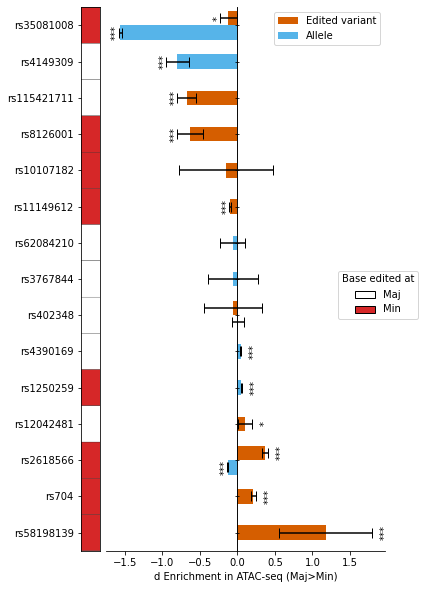

In [31]:
fig, ax = plt.subplots(figsize=(5,10), sharey=True)

# add an axes to the right of the main axes.
width = ax.get_position().x1-ax.get_position().x0
height=ax.get_position().y1-ax.get_position().y0
margin = height / (len(atac_all)+1)
cax = fig.add_axes([ax.get_position().x0-width*0.09,
                          ax.get_position().y0,
                          width*0.07,
                          height])

ax.set_ylim((-0.5, 14.5))
atac_all['mean_b'] = atac_all[['b|atac_any', 'b|atac_caqtl_any']].mean(axis=1)
atac_all = atac_all.sort_values('mean_b').reset_index(drop=True)
ax.barh(
    atac_all.index.astype(float)-0.2*atac_all.has_both.astype(float), 
    atac_all['b|atac_any'], 
    xerr=atac_all[['b_lower_error|atac_any','b_upper_error|atac_any']].T.values, 
    capsize=5, 
    label = 'Edited variant', 
    color = pal[3], 
    height=0.4
)

delta = 0.1
for idx, row in atac_all.iterrows():
    if row['b|atac_any'] >= 0:
        x = row['b_upper_error|atac_any'] + row['b|atac_any'] + delta
    elif row['b|atac_any'] < 0:
        x = row['b|atac_any'] - row['b_lower_error|atac_any'] - delta
    elif np.isnan(row['b|atac_any']):
        continue
    else:
        raise ValueError("Invalid b|atac_any")
    y = float(idx)-0.2*float(row["has_both"])
    ax.text(x, y, fwer_stars(row["p_adj|atac_any"]), rotation='vertical', verticalalignment='center')

ax.barh(
    atac_all.index.astype(float)+0.2*atac_all.has_both.astype(float), 
    atac_all['b|atac_caqtl_any'], 
    xerr=atac_all[['b_lower_error|atac_caqtl_any','b_upper_error|atac_caqtl_any']].T.values, 
    capsize=5, 
    label = 'Allele', 
    color = pal[-1], 
    height=0.4
)

for idx, row in atac_all.iterrows():
    if row['b|atac_caqtl_any'] >= 0:
        x = row['b_upper_error|atac_caqtl_any'] + row['b|atac_caqtl_any'] + delta
    elif row['b|atac_caqtl_any'] < 0:
        x = row['b|atac_caqtl_any'] - row['b_lower_error|atac_caqtl_any'] - delta
    elif np.isnan(row['b|atac_caqtl_any']):
        continue
    else:
        raise ValueError("Invalid b|atac_caqtl_any")
    y = float(idx)+0.2*float(row["has_both"])
    ax.text(x, y, fwer_stars(row["p_adj|atac_caqtl_any"]), rotation='vertical', verticalalignment='center')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_position('zero')
cmap = ListedColormap([sns.color_palette()[3], 'black', 'white'])
cax.pcolor(atac_all[['maj_min_direction']]+1, cmap=cmap, edgecolors='k')
cax.set_ylabel("")

#ax.set_ylim([0.5, len(atac_all)])
ax.axvline(0, c = 'black', linewidth = 0.5)
ax.axvline(0, c = 'black', linewidth = 0.5)
ax.legend()
ax.set_xlabel("d Enrichment in ATAC-seq (Maj>Min)")
ax.set_yticks(atac_all.index,
              labels=[])
ax.tick_params(axis='y', direction='inout')
cax.set_yticks(atac_all.index+0.5)
cax.set_xticks([], labels=[])
#cax.set_xlabel("Edit")
cax.set_yticklabels(atac_all.target.map(lambda s: s.split("_")[0]))
ax.invert_yaxis()
cax.invert_yaxis()

legend_elements = [Patch(facecolor='white', edgecolor='k',
                         label='Maj'),
                  Patch(facecolor=sns.color_palette()[3], edgecolor='k',
                         label='Min')]
fig.legend(handles=legend_elements, loc='center right', title="Base edited at")
fig.savefig("4d_ATAC_enrichment.pdf", bbox_inches="tight")